In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_multivector,plot_bloch_vector
from qiskit.quantum_info import Statevector
import numpy as np 
import matplotlib

In [2]:
qubits_Alice = QuantumRegister(2) # The quantum register of the qubits, in this case 2 qubits
qubits_Bob = QuantumRegister(1)
register1_Alice = ClassicalRegister(1) # Where the measurements of the qubits will be saved
register2_Alice = ClassicalRegister(1)

qc = QuantumCircuit(qubits_Alice,qubits_Bob, register1_Alice , register2_Alice)

In [3]:
state_to_teleport = [np.sqrt(0.5),np.sqrt(0.5)]
#state_to_teleport

### Initializing the state to be teleported

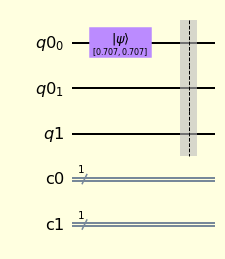

In [4]:
qc.initialize(state_to_teleport,0) # Apply initialisation operation to the 0th qubit
qc.barrier()
style = {'backgroundcolor': 'lightyellow'}
qc.draw(output='mpl', style=style) 

In [5]:
state = Statevector.from_instruction(qc)


- Showing the initial qubits in the Bloch sphere.
- The qubit 0 (Alice) will be teleported to qubit 2 (Bob)

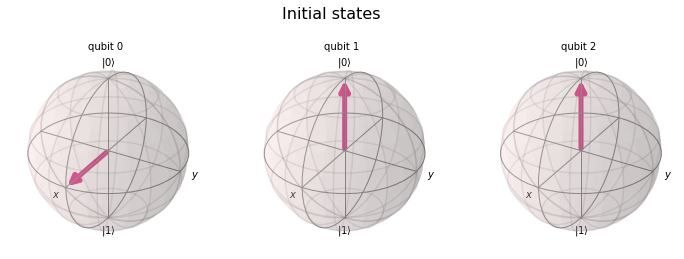

In [6]:
plot_bloch_multivector(state, title='Initial states')

- Creating entanglement between two qubits. Alice owns the qubit and Bob owns the qubit 

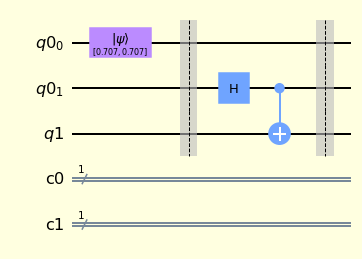

In [7]:
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.draw(output='mpl', style=style) 

- Applying a Bell measurement on Alice's qubits 0 and 1

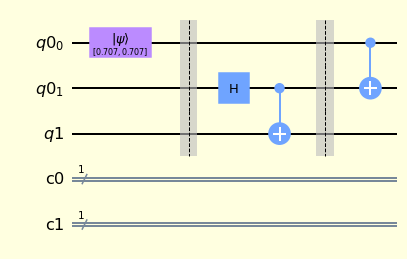

In [8]:
qc.cx(qubits_Alice[0],qubits_Alice[1])
qc.draw(output='mpl', style=style)

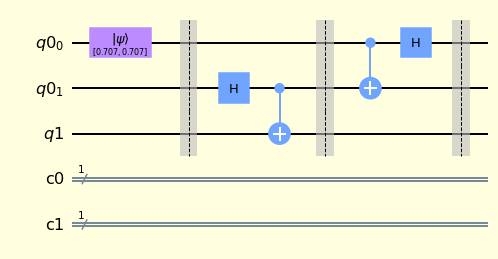

In [9]:
qc.h(qubits_Alice[0])
qc.barrier()
qc.draw(output='mpl', style=style)

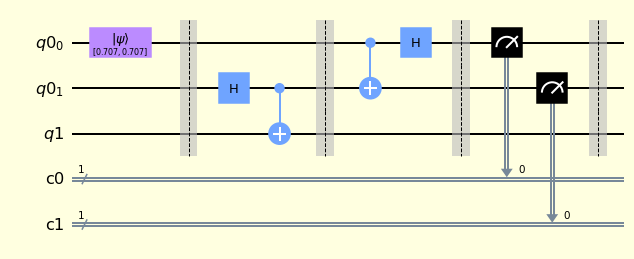

In [10]:
qc.measure(qubits_Alice[0],register1_Alice)
qc.measure(qubits_Alice[1],register2_Alice)
qc.barrier()
qc.draw(output='mpl', style=style)

- Sekarang Alice mengukur kedua qubit yang dimilikinya. Jika hasilnya adalah 00, qubit Bob memang akan memperoleh status |Psi> yang aslinya dimiliki oleh qubit pertama Alice (yang statusnya kemudian akan dikurangi menjadi |0>). Namun jika hasil pengukuran Alice adalah 10, 01, atau 11 maka keadaan qubit Bob menjadi

- Pengukuran 00
- Pengukuran 10
- Pengukuran 01
- Pengukuran 11

- Menerapkan operasi yang dikontrol secara klasik pada qubit Bob 2 bergantung pada hasil pengukuran Bell pada qubit Alice.
- Gerbang X diterapkan pada qubit Bob jika hasil pengukuran qubit kedua Alice, clbit2_Alice, adalah 1.
- Gerbang Z diterapkan pada qubit Bob jika hasil pengukuran qubit pertama Alice, clbit1_Alice, adalah 1.

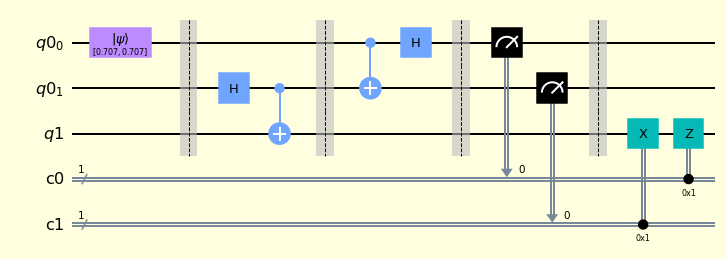

In [11]:
qc.x(qubits_Bob[0]).c_if(register2_Alice,1)
qc.z(qubits_Bob[0]).c_if(register1_Alice,1)
style = {'backgroundcolor': 'lightyellow'}
qc.draw(output='mpl', style=style) 

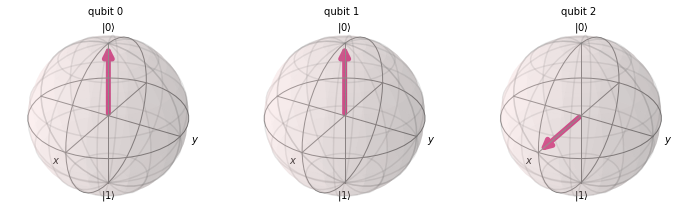

In [12]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

- Tampak bloch sphere untuk Qubit 2 adalah hasil teleportasi dari Qubit 0

In [13]:
out_vector

array([0.70710678+0.00000000e+00j, 0.        +0.00000000e+00j,
       0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
       0.70710678-8.65956056e-17j, 0.        +0.00000000e+00j,
       0.        +0.00000000e+00j, 0.        +0.00000000e+00j])

In [ ]:
# [0.4472135954999579, 0.8944271909999159]